the star of project for ML #to be edited

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
from io import StringIO
from sklearn.model_selection import train_test_split

In [157]:
# currently not in use as it does not work well
class DataWrapper:
    not_categorical = ['Age', 'Mother education', 'Father education', 
                       'Travel_Time','Study_Time' ,'Number_of_Failures',
                       'Family_Relationship', 'Free_Time', 'Going_Out', 'Weekend_Alcohol_Consumption',	'Weekday_Alcohol_Consumption',
                        'Health_Status', 'Number_of_Absences', 'Grade_1', 'Grade_2', 'Final_Grade']
    def __init__(self):
        url = 'https://raw.githubusercontent.com//zdralmat/ML_group_project/main/student%20dropout.csv'
        response = requests.get(url)
        if response.status_code == 200:
            self.data_original = pd.read_csv(StringIO(response.text))
        else:
            raise Exception("failed to load the data")
        
        self.data = self.enumerate_data()

        self.X = self.data.drop(columns=['Dropped_Out'])
        self.y = self.data['Dropped_Out']
        self.X_train,self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

    def enumerate_data(self):
        data = self.data_original.copy()
        recovery_map = {}
        for column in data.columns:
            iter = data[column].unique()
            mapping = {}
            for i, value in enumerate(iter):
                mapping[value] = i
            if column not in self.not_categorical:
                data[column] = data[column].map(mapping)
                recovery_map[column] = {v: k for k, v in mapping.items()}
            else:
                recovery_map[column] = {v: v for v in iter}
        self.recovery_map = recovery_map
        print(recovery_map)
        print(data)
        return data
    
    




In [158]:
def load_from_github():
  url = 'https://raw.githubusercontent.com//zdralmat/ML_group_project/main/student%20dropout.csv'
  response = requests.get(url)
  if response.status_code == 200:
      return pd.read_csv(StringIO(response.text))
  else:
      raise Exception("failed to load the data")      


TO_RUN = (False, False, True)


#df = pd.read_csv('student dropout.csv')
df = load_from_github()

#df = pd.read_csv('student dropout.csv')




In [159]:
pd.set_option('display.max_columns', None)
print(df.shape)

df.head()
df.sample(20)

(649, 34)


School Gender  Age Address Family_Size Parental_Status  Mother_Education  \
544     MS      M   17       R         LE3               T                 1   
625     MS      F   18       U         GT3               T                 2   
99      GP      F   16       U         GT3               T                 4   
12      GP      M   15       U         LE3               T                 4   
276     GP      M   16       U         GT3               T                 2   
626     MS      F   18       R         GT3               T                 4   
127     GP      F   19       U         GT3               T                 0   
546     MS      F   17       U         GT3               T                 4   
350     GP      M   19       R         LE3               T                 2   
289     GP      F   17       U         LE3               T                 4   
68      GP      F   15       R         LE3               T                 2   
105     GP      F   15       U         GT3               A                 3   
582     MS      F   19       U         LE3               A                 1   
645     MS      F   18       U         LE3               T                 3   
389     GP      F   18       U         LE3               T                 2   
647     MS      M   17       U         LE3               T                 3   
324     GP      M   18       U         GT3               T                 1   
529     MS      F   16       U         LE3               T                 4   
608     MS      F   18       U         LE3               A                 1   
504     MS      F   19       U         LE3               T                 2   

     Father_Education Mother_Job Father_Job Reason_for_Choosing_School  \
544                 3      other      other                     course   
625                 3    at_home   services                     course   
99                  3      other    at_home                     course   
12                  4     health   services                     course   
276                 1      other      other                     course   
626                 4      other    teacher                      other   
127                 1    at_home      other                     course   
546                 4     health     health                     course   
350                 1    at_home   services                     course   
289                 2    teacher   services                 reputation   
68                  2     health   services                 reputation   
105                 3      other     health                 reputation   
582                 1    at_home      other                     course   
645                 1    teacher   services                     course   
389                 2      other      other                       home   
647                 1   services   services                     course   
324                 2    at_home      other                       home   
529                 4   services   services                      other   
608                 1    at_home   services                     course   
504                 2      other      other                       home   

    Guardian  Travel_Time  Study_Time  Number_of_Failures School_Support  \
544   father            2           1                   0             no   
625   father            2           1                   0             no   
99    mother            1           3                   0            yes   
12    father            1           1                   0             no   
276   mother            3           1                   0             no   
626   father            3           2                   0             no   
127    other            1           2                   2             no   
546   father            1           2                   0             no   
350   mother            2           3                   1             no   
289   mo

In [160]:

df.info(verbose=False)

print(df.isnull().sum().sort_values(ascending=True))

df.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Columns: 34 entries, School to Dropped_Out
dtypes: bool(1), int64(16), object(17)
memory usage: 168.1+ KB
School                         0
Grade_2                        0
Grade_1                        0
Number_of_Absences             0
Health_Status                  0
Weekday_Alcohol_Consumption    0
Weekend_Alcohol_Consumption    0
Going_Out                      0
Free_Time                      0
Family_Relationship            0
In_Relationship                0
Internet_Access                0
Wants_Higher_Education         0
Attended_Nursery               0
Extra_Curricular_Activities    0
Extra_Paid_Class               0
Family_Support                 0
School_Support                 0
Gender                         0
Age                            0
Address                        0
Family_Size                    0
Parental_Status                0
Mother_Education               0
Final_Grade                   

Age  Mother_Education  Father_Education  Travel_Time  \
count  649.000000        649.000000        649.000000   649.000000   
mean    16.744222          2.514638          2.306626     1.568567   
std      1.218138          1.134552          1.099931     0.748660   
min     15.000000          0.000000          0.000000     1.000000   
25%     16.000000          2.000000          1.000000     1.000000   
50%     17.000000          2.000000          2.000000     1.000000   
75%     18.000000          4.000000          3.000000     2.000000   
max     22.000000          4.000000          4.000000     4.000000   

       Study_Time  Number_of_Failures  Family_Relationship   Free_Time  \
count  649.000000          649.000000           649.000000  649.000000   
mean     1.930663            0.221880             3.930663    3.180277   
std      0.829510            0.593235             0.955717    1.051093   
min      1.000000            0.000000             1.000000    1.000000   
25%      1.000000            0.000000             4.000000    3.000000   
50%      2.000000            0.000000             4.000000    3.000000   
75%      2.000000            0.000000             5.000000    4.000000   
max      4.000000            3.000000             5.000000    5.000000   

        Going_Out  Weekend_Alcohol_Consumption  Weekday_Alcohol_Consumption  \
count  649.000000                   649.000000                   649.000000   
mean     3.184900                     1.502311                     2.280431   
std      1.175766                     0.924834                     1.284380   
min      1.000000                     1.000000                     1.000000   
25%      2.000000                     1.000000                     1.000000   
50%      3.000000                     1.000000                     2.000000   
75%      4.000000                     2.000000                     3.000000   
max      5.000000                     5.000000                     5.000000   

       Health_Status  Number_of_Absences     Grade_1     Grade_2  Final_Grade  
count     649.000000          649.000000  649.000000  649.000000   649.000000  
mean        3.536210            3.659476   11.399076   11.570108    11.906009  
std         1.446259            4.640759    2.745265    2.913639     3.230656  
min         1.000000            0.000000    0.000000    0.000000     0.000000  
25%         2.000000            0.000000   10.000000   10.000000    10.000000  
50%         4.000000            2.000000   11.000000   11.000000    12.000000  
75%         5.000000            6.000000   13.000000   13.000000    14.000000  
max         5.000000           32.000000   19.000000   19.000000    19.000000

<h2>Feature selection bellow </h2>

eather we need to edit datatset so in can be transformed in to a float or we cannot use moste of the methods for feature selection

In [161]:
#splitting data and labels
Data = DataWrapper()
X = Data.X.copy()
y = Data.y.copy()



{'School': {0: 'GP', 1: 'MS'}, 'Gender': {0: 'F', 1: 'M'}, 'Age': {18: 18, 17: 17, 15: 15, 16: 16, 19: 19, 22: 22, 20: 20, 21: 21}, 'Address': {0: 'U', 1: 'R'}, 'Family_Size': {0: 'GT3', 1: 'LE3'}, 'Parental_Status': {0: 'A', 1: 'T'}, 'Mother_Education': {0: 4, 1: 1, 2: 3, 3: 2, 4: 0}, 'Father_Education': {0: 4, 1: 1, 2: 2, 3: 3, 4: 0}, 'Mother_Job': {0: 'at_home', 1: 'health', 2: 'other', 3: 'services', 4: 'teacher'}, 'Father_Job': {0: 'teacher', 1: 'other', 2: 'services', 3: 'health', 4: 'at_home'}, 'Reason_for_Choosing_School': {0: 'course', 1: 'other', 2: 'home', 3: 'reputation'}, 'Guardian': {0: 'mother', 1: 'father', 2: 'other'}, 'Travel_Time': {2: 2, 1: 1, 3: 3, 4: 4}, 'Study_Time': {2: 2, 3: 3, 1: 1, 4: 4}, 'Number_of_Failures': {0: 0, 3: 3, 1: 1, 2: 2}, 'School_Support': {0: 'yes', 1: 'no'}, 'Family_Support': {0: 'no', 1: 'yes'}, 'Extra_Paid_Class': {0: 'no', 1: 'yes'}, 'Extra_Curricular_Activities': {0: 'no', 1: 'yes'}, 'Attended_Nursery': {0: 'yes', 1: 'no'}, 'Wants_Higher_E

<h3> Variance treshold Feature selection </h3>

would require to use only on columns convertable to float or transfrom data in to form accepted by the method



In [162]:
from sklearn.feature_selection import VarianceThreshold

#removing constant features
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X)

VarianceThreshold(threshold=0)

<h3> SelectKBest Feature selection </h3>

In [163]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression


X_new = SelectKBest(chi2, k=10).fit_transform(X, y)
print(X_new.shape)

X_new = SelectKBest(f_classif, k=10).fit_transform(X, y)
print(X_new.shape)

X_new = SelectKBest(f_regression, k=10).fit_transform(X, y)
print(X_new.shape)

(649, 10)
(649, 10)
(649, 10)


<h3> Recursive Feature Elimination </h3>


In [164]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
print(selector.support_)
print(selector.ranking_)
X_new = selector.transform(X)
print(X_new.shape)

[ True False False False  True False False False False False False  True
  True  True  True  True False False False False  True False False False
 False False False False False False False  True  True]
[ 1 14 10 12  1  7 11  2 15 20 17  1  1  1  1  1 13  5 16  3  1  4 24 19
 22  9 21 18  8 23  6  1  1]
(649, 10)


<h3> Feature selection using SelectFromModel </h3>



In [165]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

sfs = SequentialFeatureSelector(KNeighborsClassifier(n_neighbors=3),
              n_features_to_select=10,
              direction='backward').fit(X, y)
print(sfs.get_support())
X_new = sfs.transform(X)
print(X_new.shape)

[False False  True  True False False False  True False False False False
  True False  True False False False False  True False  True False False
 False False False  True False False False  True  True]
(649, 10)


all of feature selection methods are currently being ignored feel free to use them i did not use them as i do not understad them well enough to use them 
also it is using my enumeration which might be not good even for this task
do with it what you will

<h2> classification </h2>

In [166]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.pipeline import Pipeline


warning: the tuning of hyperparameters takes a while

In [167]:
def hyperparametar_tuning(model, X, y, param_grid, cv=5, scoring='accuracy'):
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring)
    grid_search.fit(X, y)
    return grid_search.best_params_, grid_search.best_score_ , grid_search.best_estimator_


my enumeration did not work as intended so i borrowed the code from the following link
https://www.kaggle.com/code/mhamza786/student-dropout-analysis
is very similar to code that can be found in the documentatation of the sklearn library so 
https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
so i thing it should be fine to use it

In [168]:
X = df.drop(columns=['Dropped_Out'])
X_clustering = df[['Grade_1', 'Grade_2', 'Final_Grade']]
y = df['Dropped_Out']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_clustering, X_test_clustering, y_train_clustering, y_test_clustering = train_test_split(X_clustering, y, test_size=0.2, random_state=42)

In [169]:


numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

column_transformer = ColumnTransformer(
    transformers=[
        ['encoder', OneHotEncoder(), categorical_features],
        ['scaler', StandardScaler(), numeric_features]
    ],
    remainder='passthrough'
)

numeric_features_clustering = X_train_clustering.select_dtypes(include=['int64', 'float64']).columns

column_transformer_clustering = ColumnTransformer(
    transformers=[
        ['scaler', StandardScaler(), numeric_features_clustering]
    ],
    remainder='passthrough'
)





label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

y_train_clustering = label_encoder.fit_transform(y_train_clustering)
y_test_clustering = label_encoder.transform(y_test_clustering)





In [170]:
class Result:
    def __init__(self, name , value, params):
        self.name = name
        self.value = value
        self.params = params
    
    def __str__(self):
        return f'{self.name}: {self.value} with params: {self.params}'
    
    def __repr__(self):
        return self.__str__()

In [171]:
class Table:
    def __init__(self, model_names, metric_names):
        self.model_names = model_names
        self.metric_names = metric_names
        self.data = {model: {metric: [] for metric in metric_names} for model in model_names}
    
    def add_result(self, model_name, metric_name, value, params):
        self.data[model_name][metric_name].append(Result(metric_name, value, params))
    
    def __str__(self):
        result = ''
        for model_name in self.model_names:
            result += f'{model_name}\n'
            for metric_name in self.metric_names:
                result += f'{metric_name}: {self.data[model_name][metric_name]}\n'
        return result
    
    def model(self, model_name):
        string = ''
        data = self.data[model_name]
        for metric_name in self.metric_names:
            string += f'{str(data[metric_name])}\n'
        
        return string
    
        

In [172]:
metrics = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']
metrics_mapping = {
    'accuracy': accuracy_score,
    'f1': f1_score,
    'precision': precision_score,
    'recall': recall_score,
    'roc_auc': roc_auc_score
}
models = ['CART', 'RandomForest', 'SVM', 'GaussianNB', 'MultinomialNB', 'BernoulliNB']

table = Table(models, metrics)
print(table)


CART
accuracy: []
f1: []
precision: []
recall: []
roc_auc: []
RandomForest
accuracy: []
f1: []
precision: []
recall: []
roc_auc: []
SVM
accuracy: []
f1: []
precision: []
recall: []
roc_auc: []
GaussianNB
accuracy: []
f1: []
precision: []
recall: []
roc_auc: []
MultinomialNB
accuracy: []
f1: []
precision: []
recall: []
roc_auc: []
BernoulliNB
accuracy: []
f1: []
precision: []
recall: []
roc_auc: []



In [173]:
# Ensure X_train and X_test have the same columns
assert list(X_train.columns) == list(X_test.columns), "X_train and X_test have different columns"

# Fit the column transformer on the training data only
column_transformer.fit(X_train)

# Transform the training and test data separately
X_train_transformed = column_transformer.transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

In [174]:


CART_params = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random'],
    'classifier__max_depth': [10, 50, 100, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': [None, 'sqrt', 'log2']
}

CART = DecisionTreeClassifier()
pipe = Pipeline(steps=[('classifier', CART)])

if TO_RUN[0]:
    for metric in metrics:
        params, value, model = hyperparametar_tuning(pipe, X_train_transformed, y_train, CART_params, scoring=metric)
        table.add_result('CART', metric, metrics_mapping[metric](y_test, model.predict(X_test_transformed)), params)

    print(table.model('CART'))



it ran for 78 minutes on my machine so would recomend not to run it yourself

(talking aout the cell below)

In [175]:

rf_params = {'classifier__n_estimators': [10, 50, 100, 300, 500], 
             'classifier__max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
             'classifier__min_samples_leaf': [1, 2, 5, 10], 
             'classifier__max_features': [None, 'sqrt', 'log2']}

#rf_params = {'classifier__n_estimators': [10, 50, 100, 300, 500]}
rf = RandomForestClassifier()
pipe = Pipeline(steps=[('classifier', rf)])

if TO_RUN[0]:
    for metric in metrics:
        best_params, best_score, model = hyperparametar_tuning(pipe, X_train_transformed, y_train, rf_params, scoring=metric)
        table.add_result('RandomForest', metric, metrics_mapping[metric](y_test, model.predict(X_test_transformed)), best_params)

    print("RandomForest: ", table.model('RandomForest'))


In [176]:

svm_params = {'classifier__C': [0.1, 1, 10, 100, 1000], 'classifier__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'classifier__kernel': ['rbf', 'poly', 'sigmoid']}
machine = svm.SVC()
pipe = Pipeline(steps=[('classifier', machine)])
if TO_RUN[0]:
    for metric in metrics:
        best_params, svm_score, model = hyperparametar_tuning(pipe, X_train_transformed, y_train, svm_params, scoring=metric)
        table.add_result('SVM', metric, metrics_mapping[metric](y_test, model.predict(X_test_transformed)), best_params)

    print("SVM : ", table.model('SVM'))

In [177]:
gaussian_params = {"classifier__var_smoothing": [1e-9, 1e-10, 1e-11, 1e-12, 1e-13]}
bernouli_params = {"classifier__alpha": [1.0, 0.1, 0.01, 0.001, 0.0001]}
multinomial_params = {"classifier__alpha": [1.0, 0.1, 0.01, 0.001, 0.0001]}

gaussian = GaussianNB()
g_pipe = Pipeline(steps=[('classifier', gaussian)])
bernouli = BernoulliNB()
b_pipe = Pipeline(steps=[('classifier', bernouli)])
multinomial = MultinomialNB()
m_pipe = Pipeline(steps=[('classifier', multinomial)])


if TO_RUN[0]:
    for metric in metrics:
        best_gaussian_params, gaussian_score, gaussian_model = hyperparametar_tuning(g_pipe, X_train_transformed, y_train, gaussian_params, scoring=metric)
        table.add_result('GaussianNB', metric, metrics_mapping[metric](y_test, gaussian_model.predict(X_test_transformed)), best_gaussian_params)
        
        best_bernouli_params, bernouli_score, bernouli_model = hyperparametar_tuning(b_pipe, X_train_transformed, y_train, bernouli_params, scoring=metric)
        table.add_result('BernoulliNB', metric, metrics_mapping[metric](y_test, bernouli_model.predict(X_test_transformed)), best_bernouli_params)
        
        # Ensure no negative values for MultinomialNB
        
        X_non_negative_train = np.maximum(X_train_transformed, 0)
        X_non_negative_test = np.maximum(X_test_transformed, 0)
        best_multinomial_params, multinomial_score, multinomial_model = hyperparametar_tuning(m_pipe, X_non_negative_train, y_train, multinomial_params, scoring=metric)
        table.add_result('MultinomialNB', metric, metrics_mapping[metric](y_test, multinomial_model.predict(X_non_negative_test)), best_multinomial_params)

    print("GaussianNB: ",table.model('GaussianNB'))
    print("BernoulliNB: ",table.model('BernoulliNB'))
    print("MultinomialNB: ",table.model('MultinomialNB'))

    print(table)

In [178]:
def save_table(table, filename):
    with open(filename, 'w') as file:
        file.write(str(table))



In [179]:
if TO_RUN[0]:
    save_table(table, 'results_classification_no_spill_.txt')

<h2> regression </h2>

In [180]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import HuberRegressor, RANSACRegressor, TheilSenRegressor
from sklearn.svm import NuSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

In [181]:
def regre_hyperparametar_tuning(model, X, y, param_grid, cv=5, scoring='neg_mean_squared_error'):
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring)
    grid_search.fit(X, y)
    return grid_search.best_params_, grid_search.best_score_ , grid_search.best_estimator_

In [182]:
metrics = ['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']
metrics_mapping = {
    'neg_mean_squared_error': mean_squared_error,
    'r2': r2_score,
    'neg_mean_absolute_error': mean_absolute_error,
    'neg_mean_absolute_percentage_error': mean_absolute_percentage_error
}

models = ['LinearRegression', 'HuberRegressor', 'RANSACRegressor', 'TheilSenRegressor', 'NuSVR', 'DecisionTreeRegressor', 'RandomForestRegressor']

table_regre = Table(models, metrics)

In [183]:
H_params = {'alpha': [0.1, 1, 10, 100, 1000], 'epsilon': [1, 1.35, 10, 100, 1000], 'max_iter': [100, 1000, 10000]}
H = HuberRegressor()
#H_params, H_score = regre_hyperparametar_tuning(H, X, y, H_params)
#print(H_params, H_score)
if TO_RUN[1]:
    for metric in metrics:
        best_params, best_score, model = regre_hyperparametar_tuning(H, X_train_transformed, y_train, H_params, scoring=metric)
        print(best_params, best_score)
        #table_regre.add_result('HuberRegressor', metric, best_score, best_params)
        table_regre.add_result('HuberRegressor', metric, metrics_mapping[metric](y_test, model.predict(X_test_transformed)), best_params)

    print("HuberRegressor: ", table_regre.model('HuberRegressor'))

In [184]:
if TO_RUN[1]:
    print(table_regre)

In [185]:
RANSAC_params = {'min_samples': [0.1, 1, 10, 100], 'max_trials': [100, 1000, 10000]}
RANSAC = RANSACRegressor()

#RANSAC_params, RANSAC_score = regre_hyperparametar_tuning(RANSAC, X, y, RANSAC_params)
#print(RANSAC_params, RANSAC_score)
if TO_RUN[1]:
    for metric_name in metrics:
        best_params, best_score, model = regre_hyperparametar_tuning(RANSAC, X_train_transformed, y_train, RANSAC_params, scoring=metric_name)
        #table_regre.add_result('RANSACRegressor', metric_name, best_score, best_params)
        table_regre.add_result('RANSACRegressor', metric_name, metrics_mapping[metric_name](model.predict(X_test_transformed), y_test), best_params)

    print("RANSACRegressor: ", table_regre.model('RANSACRegressor'))


In [186]:
theil_params = {'max_subpopulation': [ 1, 10, 100, 1000], 'max_iter': [100, 300, 1000, 10000]}
theil = TheilSenRegressor()

#theil_params, theil_score = regre_hyperparametar_tuning(theil, X, y, theil_params)
#print(theil_params, theil_score)
if TO_RUN[1]:
    for metric in metrics:
        best_params, best_score, model = regre_hyperparametar_tuning(theil, X_train_transformed, y_train, theil_params, scoring=metric)
        #table_regre.add_result('TheilSenRegressor', metric, best_score, best_params)
        table_regre.add_result('TheilSenRegressor', metric, metrics_mapping[metric](y_test, model.predict(X_test_transformed)), best_params)

    print("TheilSenRegressor: ", table_regre.model('TheilSenRegressor'))

In [187]:
NuSVR_params = {'nu': [0.0001,0.001,0.01,0.1, 1], 'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf', 'poly', 'sigmoid']}
NuSVR_ = NuSVR()

#NuSVR_params, NuSVR_score = regre_hyperparametar_tuning(NuSVR_, X, y, NuSVR_params)
#print(NuSVR_params, NuSVR_score)
if TO_RUN[1]:
    for metric in metrics:
        best_params, best_score, model = regre_hyperparametar_tuning(NuSVR_, X_train_transformed, y_train, NuSVR_params, scoring=metric)
        #table_regre.add_result('NuSVR', metric, best_score, best_params)
        table_regre.add_result('NuSVR', metric, metrics_mapping[metric](y_test, model.predict(X_test_transformed)), best_params)

    print("NuSVR: ", table_regre.model('NuSVR'))

In [188]:
dt_params = {'criterion': ['squared_error', 'friedman_mse', 'poisson', 'absolute_error'], 'splitter': ['best', 'random'], 'max_depth': [None]+ [x for x in range(5,100,5)]}
dt = DecisionTreeRegressor()

#dt_params, dt_score = regre_hyperparametar_tuning(dt, X, y, dt_params)
#print(dt_params, dt_score)
if TO_RUN[1]:
    for metric in metrics:
        best_params, best_score, model = regre_hyperparametar_tuning(dt, X_train_transformed, y_train, dt_params, scoring=metric)
        #table_regre.add_result('DecisionTreeRegressor', metric, best_score, best_params)
        table_regre.add_result('DecisionTreeRegressor', metric, metrics_mapping[metric](y_test, model.predict(X_test_transformed)), best_params)

    print("DecisionTreeRegressor: ", table_regre.model('DecisionTreeRegressor'))

In [189]:
rfr_params = {'n_estimators': [x for x in range(10,500,100)], 'max_depth': [None]+ [x for x in range(5,100,5)]}
rfr = RandomForestRegressor()

#rfr_params, rfr_score = regre_hyperparametar_tuning(rfr, X, y, rfr_params)
#print(rfr_params, rfr_score)
if TO_RUN[1]:
    for metric in metrics:
        best_params, best_score, model = regre_hyperparametar_tuning(rfr, X_train_transformed, y_train, rfr_params, scoring=metric)
        #table_regre.add_result('RandomForestRegressor', metric, best_score, best_params)
        table_regre.add_result('RandomForestRegressor', metric, metrics_mapping[metric](y_test, model.predict(X_test_transformed)), best_params)

    print("RandomForestRegressor: ", table_regre.model('RandomForestRegressor'))

In [190]:
linear_params = {'fit_intercept': [True, False], 'copy_X': [True, False]}
linear = linear_model.LinearRegression()
if TO_RUN[1]:
    for metric in metrics:
        best_params, best_score, model = regre_hyperparametar_tuning(linear, X_train_transformed, y_train, linear_params, scoring=metric)
        #table_regre.add_result('LinearRegression', metric, best_score, best_params)
        table_regre.add_result('LinearRegression', metric, metrics_mapping[metric](y_test, model.predict(X_test_transformed)), best_params)

    print("LinearRegression: ", table_regre.model('LinearRegression'))

In [191]:

if TO_RUN[1]:
    save_table(table_regre, 'results_regression_.txt')


    with open('results_regression_.txt', 'a') as file:
        file.write("\n the negative metrics are alredy replaced with normal ones in the table\n")



<h2> clustering </h2>

for the clustering we are using only 3 columns so we can graph it if you thing we should do it with the complete dataset let me know

In [192]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, OPTICS, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import make_scorer

In [193]:
def cluster_hyperparametar_tuning(model, X, y, param_grid, cv=5, scoring='silhouette_score'):
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring)
    grid_search.fit(X, y)
    return grid_search.best_params_, grid_search.best_score_


In [194]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_clustering_3d(X, labels, title='Clustering Results'):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    unique_labels = set(labels)
    colors = plt.get_cmap('viridis', len(unique_labels))

    for k in unique_labels:
        class_member_mask = (labels == k)
        xyz = X[class_member_mask]
        ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], s=50, color=colors(k / len(unique_labels)), label=f'Cluster {k}')

    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.legend()
    plt.show()

In [195]:
def ari_scorer(X, y_true, cluster_labels):
    return adjusted_rand_score(y_true, cluster_labels)

def ami_scorer(X, y_true, cluster_labels):
    return adjusted_mutual_info_score(y_true, cluster_labels)

def homogeneity_scorer(X, y_true, cluster_labels):
    return homogeneity_score(y_true, cluster_labels)

def completeness_scorer(X, y_true, cluster_labels):
    return completeness_score(y_true, cluster_labels)

def v_measure_scorer(X, y_true, cluster_labels):
    return v_measure_score(y_true, cluster_labels)

def sil_scorer(X, y_true, cluster_labels):
    return silhouette_score(X, cluster_labels)

def ch_scorer(X, y_true, cluster_labels):
    return calinski_harabasz_score(X, cluster_labels)

def db_scorer(X, y_true, cluster_labels):
    return davies_bouldin_score(X, cluster_labels)

In [196]:

models = ['KMeans', 'DBSCAN', 'AgglomerativeClustering', 'OPTICS', 'Birch']
metrics = [ 'adjusted_rand_score', 'adjusted_mutual_info_score', 'homogeneity_score', 'completeness_score', 'v_measure_score','silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score']#, are not available for DBSCAN

metrics_mapping = {
    'adjusted_rand_score': ari_scorer,
    'adjusted_mutual_info_score': ami_scorer,
    'homogeneity_score': homogeneity_scorer,
    'completeness_score': completeness_scorer,
    'v_measure_score': v_measure_scorer,
    'silhouette_score': sil_scorer,
    'calinski_harabasz_score': ch_scorer,
    'davies_bouldin_score': db_scorer

}

cluster_table = Table(models, metrics)

In [197]:
X_train_clustering_transformed = column_transformer_clustering.fit_transform(X_train_clustering)
X_test_clustering_transformed = column_transformer_clustering.transform(X_test_clustering)


In [198]:
from itertools import product
def manual_hyperparam_tuning(X, y_true, param_grid, metrics, models):
    best_params = {metric: None for metric in metrics}
    best_scores = {metric: float('-inf') for metric in metrics}
    best_model = {metric: None for metric in metrics}

    #print(best_params)
    #print(best_scores)

    # Generate all combinations of parameters
    keys, values = zip(*param_grid.items())
    for v in product(*values):
        #print(v)
        params = dict(zip(keys, v))
        model = models(**params)
        cluster_labels = model.fit_predict(X)


        if len(set(cluster_labels)) <= 1 and models == DBSCAN:
            continue

        # Evaluate each metric
        for metric_name, metric_func in metrics.items():
            score = metric_func(X ,y_true, cluster_labels)
            if score > best_scores[metric_name]:
                best_scores[metric_name] = score
                best_params[metric_name] = params
                best_model[metric_name] = model

    return best_params, best_scores, best_model

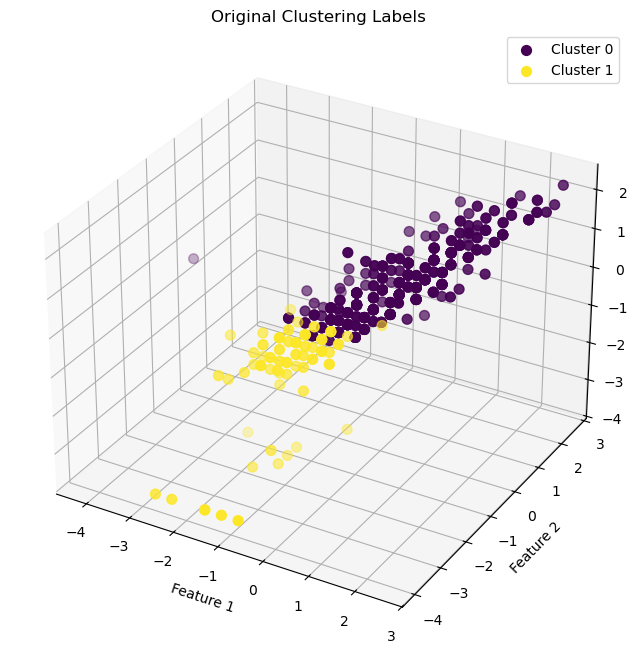

In [199]:
plot_clustering_3d(X_train_clustering_transformed, y_train_clustering, title='Original Clustering Labels')

c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known

KMeans:  [adjusted_rand_score: 0.3145550126327782 with params: {'n_clusters': 3, 'init': 'k-means++', 'n_init': 10, 'max_iter': 100}]
[adjusted_mutual_info_score: 0.43152996905203655 with params: {'n_clusters': 3, 'init': 'k-means++', 'n_init': 10, 'max_iter': 100}]
[homogeneity_score: 0.7287229731688066 with params: {'n_clusters': 7, 'init': 'random', 'n_init': 100, 'max_iter': 100}]
[completeness_score: 0.31201078557928785 with params: {'n_clusters': 3, 'init': 'k-means++', 'n_init': 10, 'max_iter': 100}]
[v_measure_score: 0.43304917025990786 with params: {'n_clusters': 3, 'init': 'k-means++', 'n_init': 10, 'max_iter': 100}]
[silhouette_score: 0.49578076433046864 with params: {'n_clusters': 2, 'init': 'k-means++', 'n_init': 10, 'max_iter': 100}]
[calinski_harabasz_score: 764.743666339473 with params: {'n_clusters': 5, 'init': 'k-means++', 'n_init': 100, 'max_iter': 100}]
[davies_bouldin_score: 0.9451521453594984 with params: {'n_clusters': 8, 'init': 'random', 'n_init': 10, 'max_iter

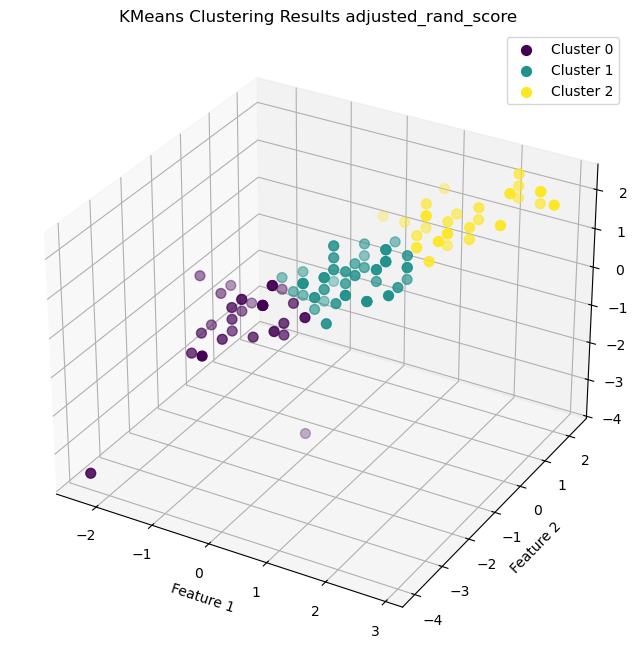

c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


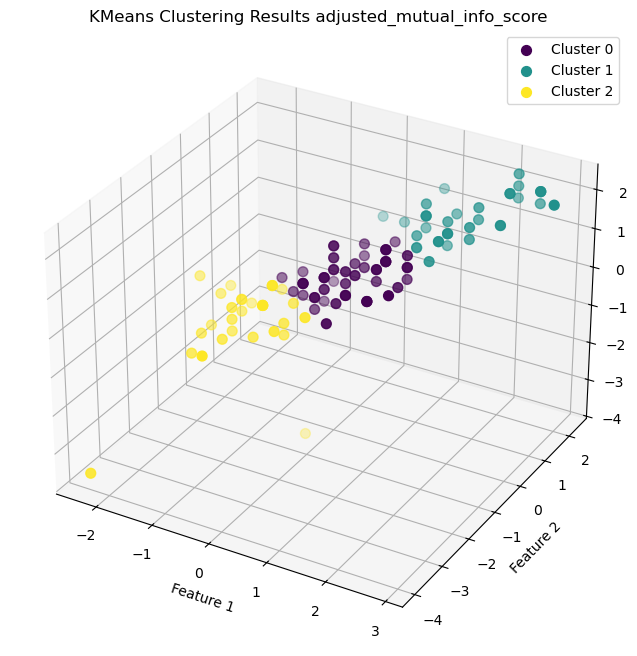

c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


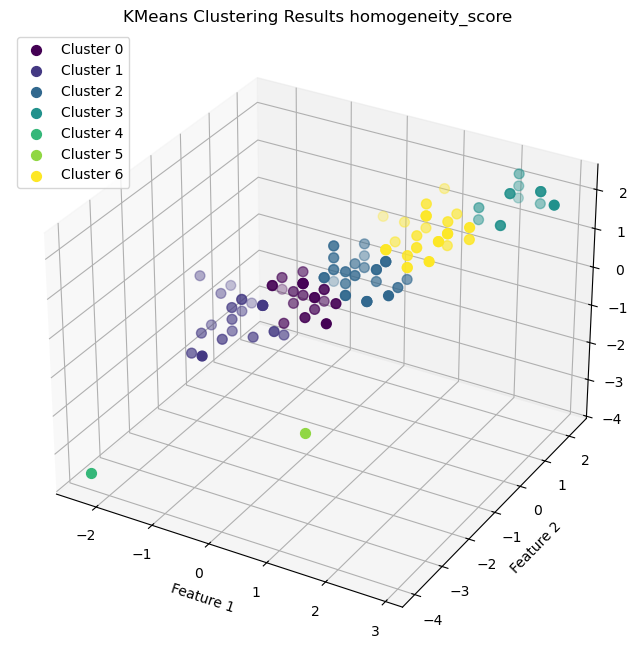

c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


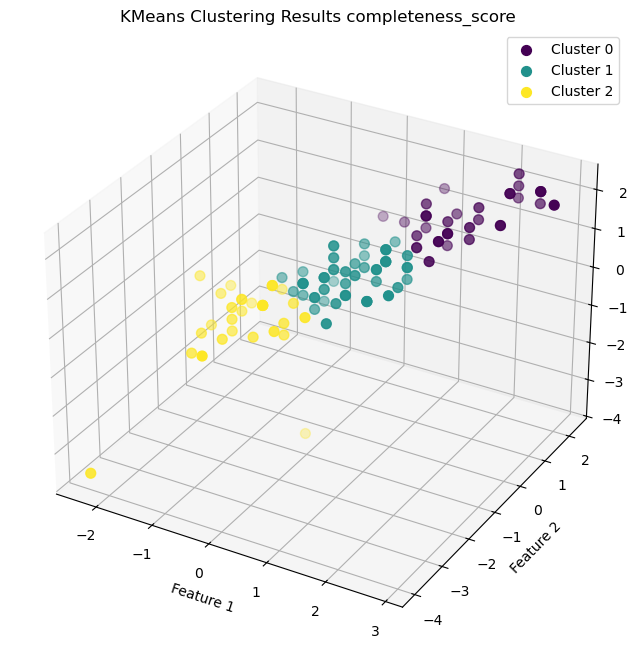

c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


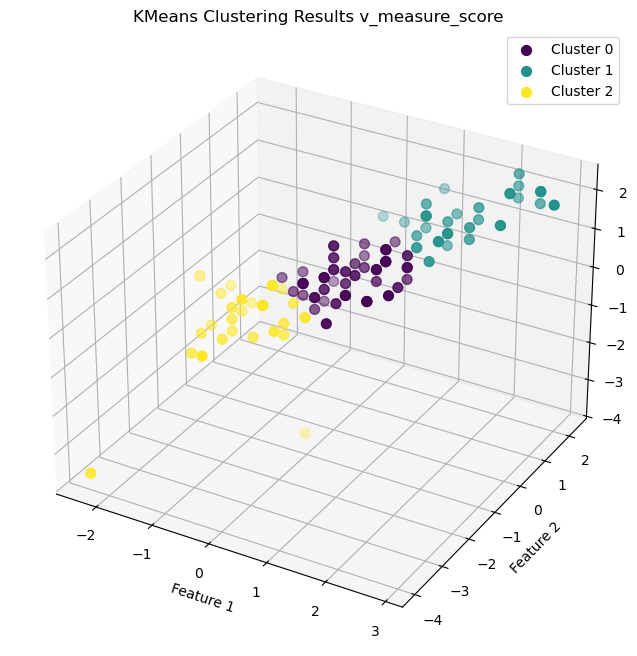

c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


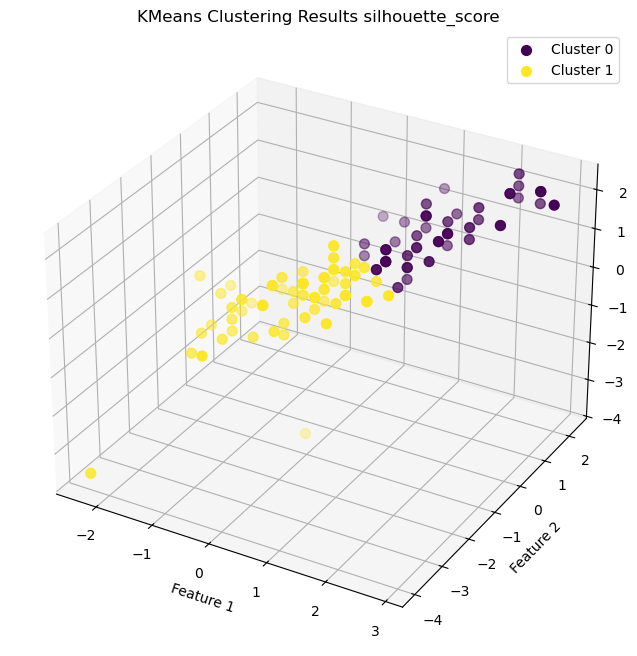

c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


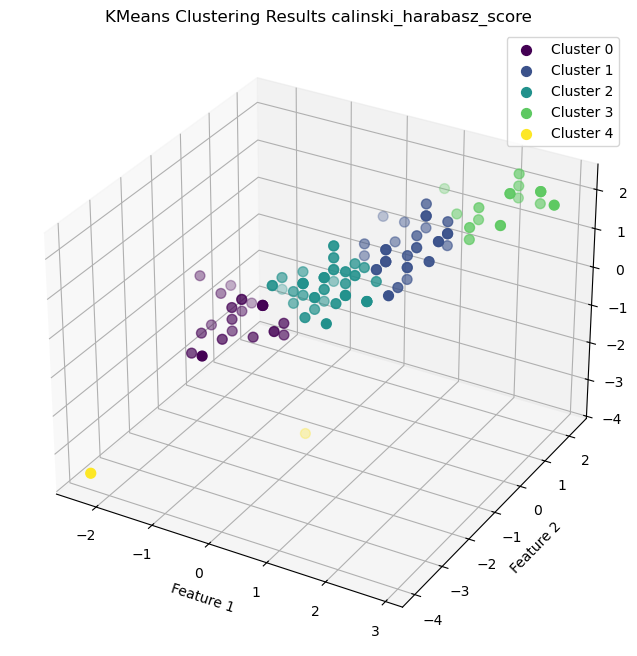

c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


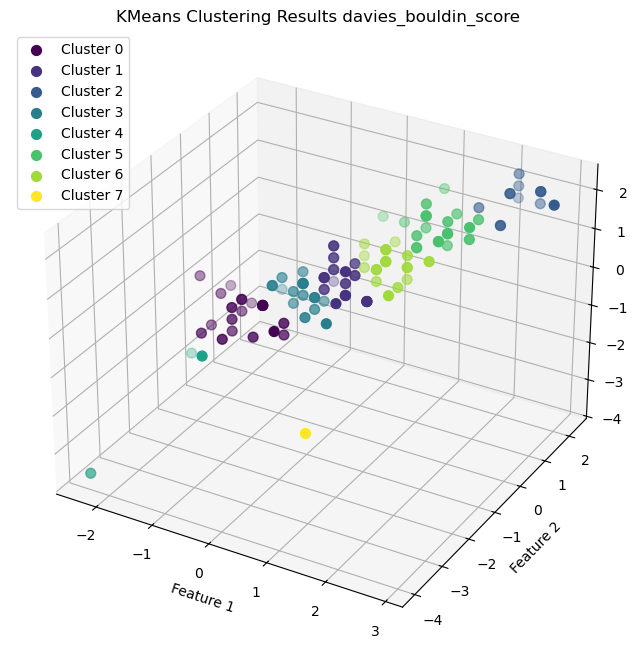

In [200]:
K_params = {'n_clusters': [x for x in range(2,10)], 'init': ['k-means++', 'random'], 'n_init': [10, 100], 'max_iter': [100, 1000]}
K = KMeans()
model = KMeans()

if TO_RUN[2]:
    best_params, best_scores, best_model = manual_hyperparam_tuning(X_train_clustering_transformed, y_train_clustering, K_params, metrics_mapping, KMeans)

    # Print the best parameters and scores for each metric

    for best_param, best_score in zip(best_params.items(), best_scores.items()):
        #print(best_param, best_score)
        #print(f'Achieved {best_score[0]} of {best_score[1]} with parameters {best_param[1]}')
        cluster_table.add_result('KMeans', best_score[0], best_score[1], best_param[1])

    print("KMeans: ", cluster_table.model('KMeans'))
    for metric , best_model in best_model.items():
        model = best_model
        plot_clustering_3d(X_test_clustering_transformed, model.fit_predict(X_test_clustering_transformed), title='KMeans Clustering Results ' + metric)




    '''for metric in metrics:
        optimizer = GridSearchCV(K, K_params, cv=5, scoring=metric)
        optimizer.fit(X_train_clustering_transformed, y_train_clustering)
        best_params = optimizer.best_params_
        best_score = optimizer.best_score_
        best_model = optimizer.best_estimator_
        cluster_table.add_result('KMeans', metric, metrics_mapping[metric](y_test_clustering, best_model.predict(X_test_clustering_transformed)), best_params)
        model = best_model


        #best_params, best_score = cluster_hyperparametar_tuning(KMeans, X_clustering, y, KMeans_params, scoring=metric)
        #cluster_table.add_result('KMeans', metric, best_score, best_params)

    print("KMeans: ", cluster_table.model('KMeans'))
    plot_clustering_3d(X_train_clustering_transformed, model.labels_, title='KMeans Clustering Results')
'''

DBSCAN:  [adjusted_rand_score: 0.37292478141867563 with params: {'eps': 0.5, 'min_samples': 20, 'metric': 'manhattan'}]
[adjusted_mutual_info_score: 0.23136551730790886 with params: {'eps': 0.5, 'min_samples': 20, 'metric': 'manhattan'}]
[homogeneity_score: 0.3472929734886509 with params: {'eps': 0.1, 'min_samples': 5, 'metric': 'euclidean'}]
[completeness_score: 0.33616589221996634 with params: {'eps': 1.0, 'min_samples': 10, 'metric': 'euclidean'}]
[v_measure_score: 0.23284061484127286 with params: {'eps': 0.5, 'min_samples': 20, 'metric': 'manhattan'}]
[silhouette_score: 0.6043934490032273 with params: {'eps': 1.0, 'min_samples': 10, 'metric': 'euclidean'}]
[calinski_harabasz_score: 128.76472589085114 with params: {'eps': 1.0, 'min_samples': 10, 'metric': 'euclidean'}]
[davies_bouldin_score: 12.95644433666494 with params: {'eps': 0.5, 'min_samples': 20, 'metric': 'manhattan'}]



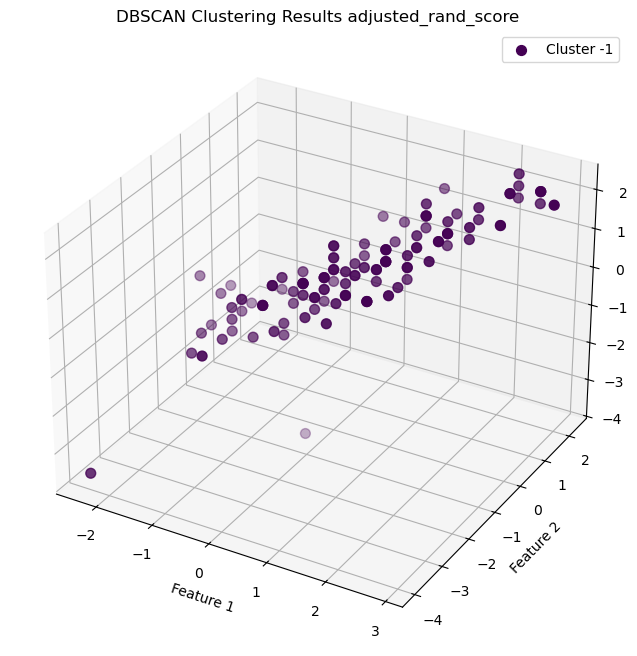

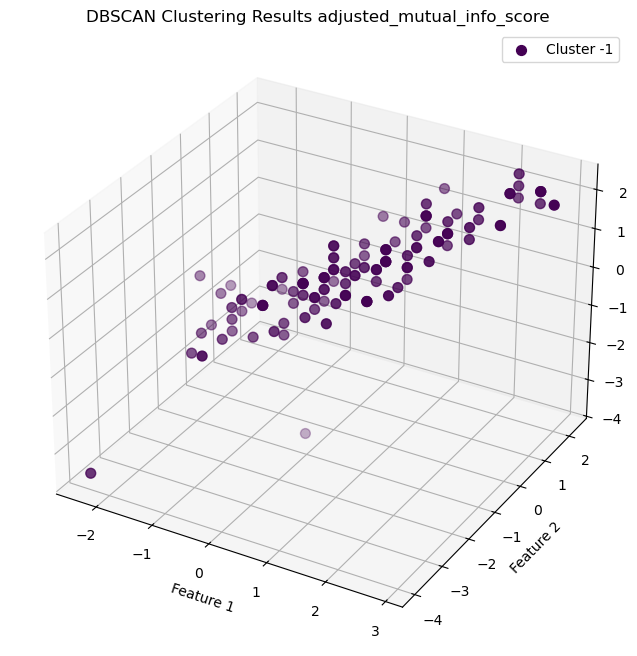

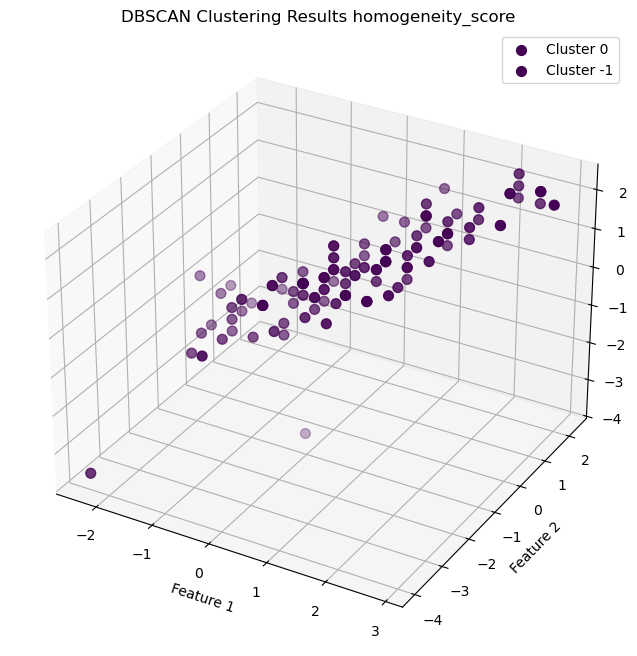

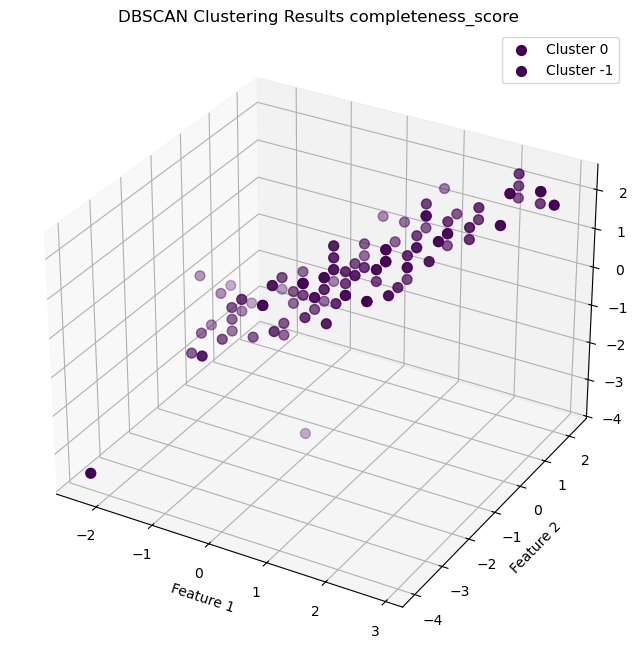

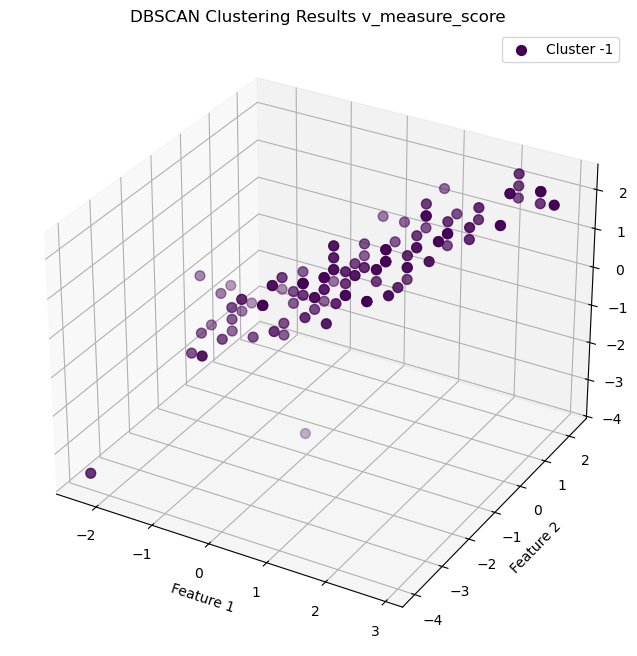

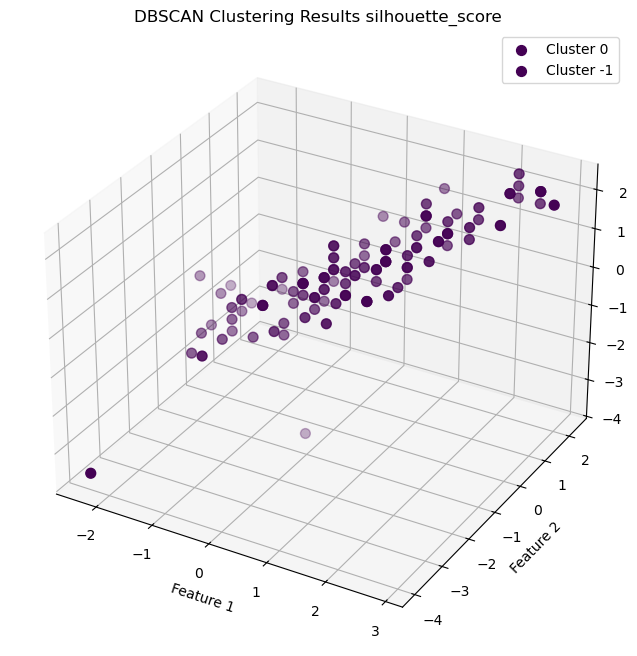

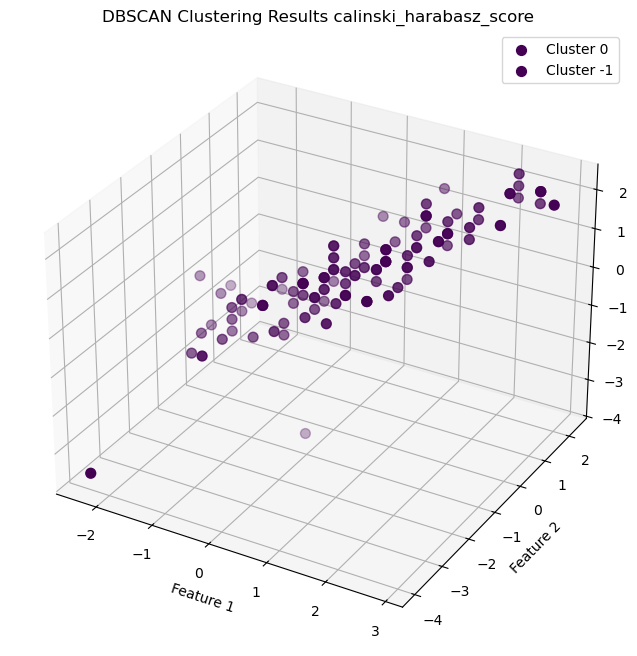

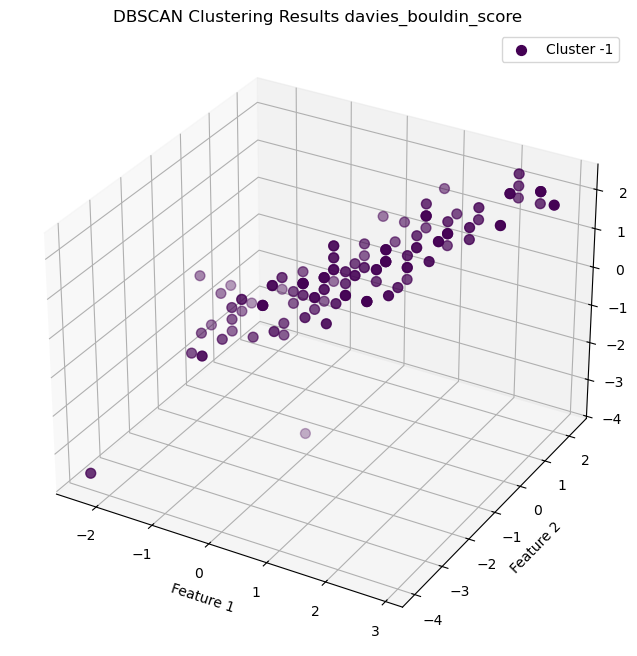

In [201]:
from sklearn.metrics import make_scorer

D_params = {
    'eps': [0.1, 0.5, 1.0],
    'min_samples': [5, 10, 20],
    'metric': ['euclidean', 'manhattan']
}
D = DBSCAN()
model = DBSCAN()

if TO_RUN[2]:

    best_params, best_scores, best_model = manual_hyperparam_tuning(X_train_clustering_transformed, y_train_clustering, D_params, metrics_mapping, DBSCAN)

    # Print the best parameters and scores for each metric

    for best_param, best_score in zip(best_params.items(), best_scores.items()):
        #print(best_param, best_score)
        #print(f'Achieved {best_score[0]} of {best_score[1]} with parameters {best_param[1]}')
        cluster_table.add_result('DBSCAN', best_score[0], best_score[1], best_param[1])

    print("DBSCAN: ", cluster_table.model('DBSCAN'))
    for metric , best_model in best_model.items():
        model = best_model
        plot_clustering_3d(X_test_clustering_transformed, model.fit_predict(X_test_clustering_transformed), title='DBSCAN Clustering Results ' + metric)




    '''for metric in ['adjusted_rand_score', 'adjusted_mutual_info_score', 'homogeneity_score', 'completeness_score', 'v_measure_score']:
        scorer = make_scorer(metrics_mapping[metric])
        optimizer = GridSearchCV(D, D_params, cv=5, scoring=scorer)
        optimizer.fit(X_train_clustering_transformed, y_train_clustering)
        best_params = optimizer.best_params_
        best_model = optimizer.best_estimator_
        cluster_table.add_result('DBSCAN', metric, metrics_mapping[metric](y_test_clustering, best_model.fit_predict(X_test_clustering_transformed)), best_params)
        model = best_model

    print("DBSCAN: ", cluster_table.model('DBSCAN'))
    plot_clustering_3d(X_test_clustering_transformed, model.labels_, title='DBSCAN Clustering Results')
'''


AgglomerativeClustering:  [adjusted_rand_score: 0.3498937563191927 with params: {'n_clusters': 6, 'linkage': 'average'}]
[adjusted_mutual_info_score: 0.4611052332297904 with params: {'n_clusters': 3, 'linkage': 'complete'}]
[homogeneity_score: 0.7683959298820561 with params: {'n_clusters': 9, 'linkage': 'complete'}]
[completeness_score: 0.4094006396319954 with params: {'n_clusters': 2, 'linkage': 'average'}]
[v_measure_score: 0.4625823270070667 with params: {'n_clusters': 3, 'linkage': 'complete'}]
[silhouette_score: 0.6072876284609366 with params: {'n_clusters': 2, 'linkage': 'average'}]
[calinski_harabasz_score: 668.3947231186618 with params: {'n_clusters': 2, 'linkage': 'ward'}]
[davies_bouldin_score: 0.9388345123456734 with params: {'n_clusters': 7, 'linkage': 'ward'}]



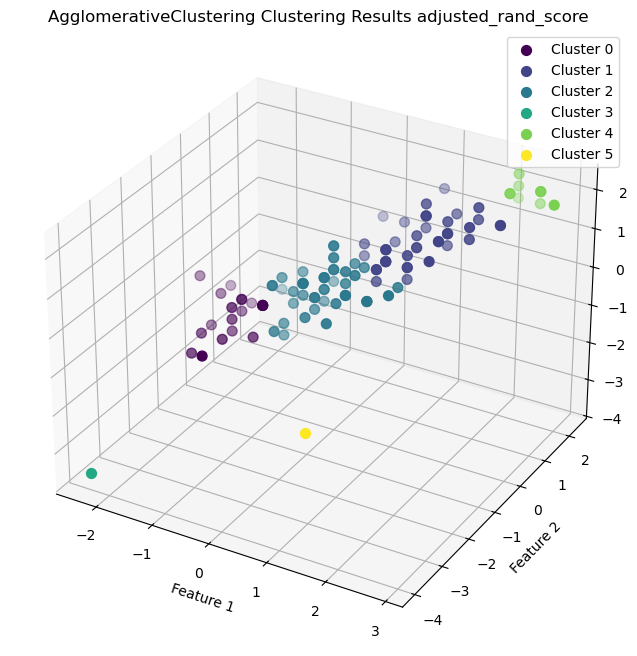

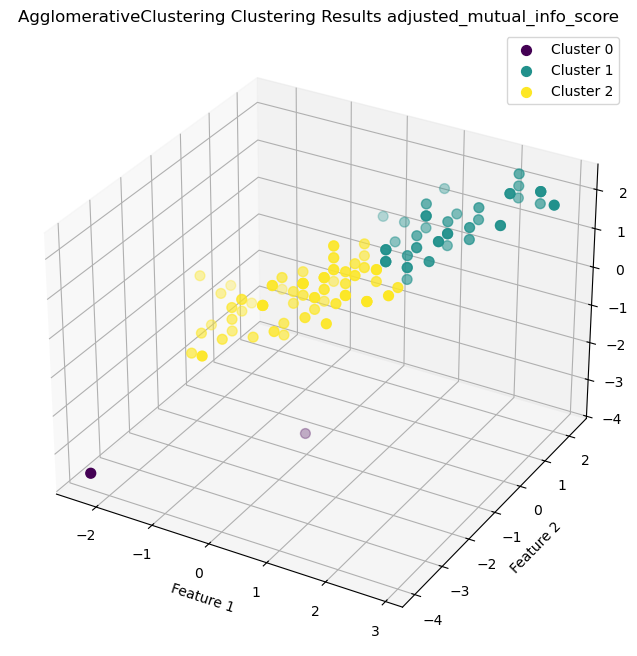

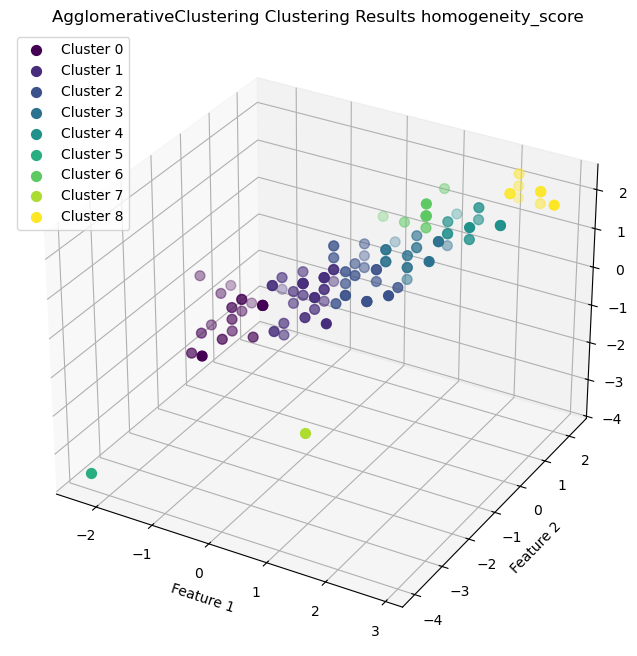

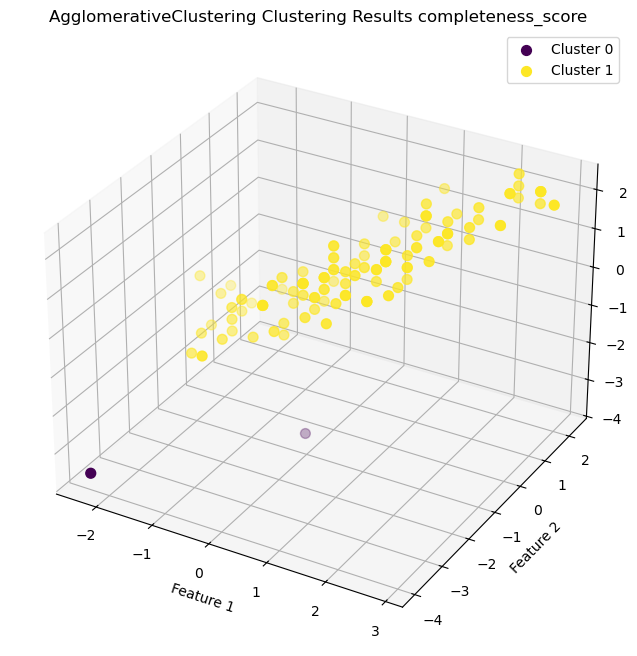

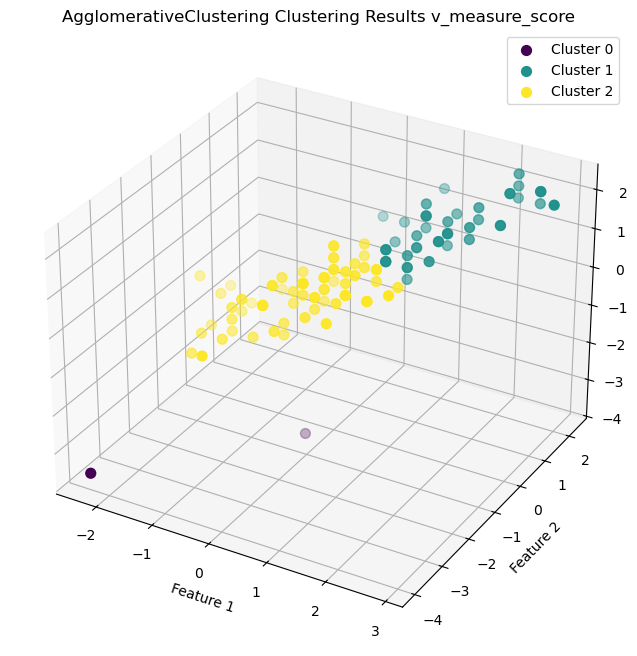

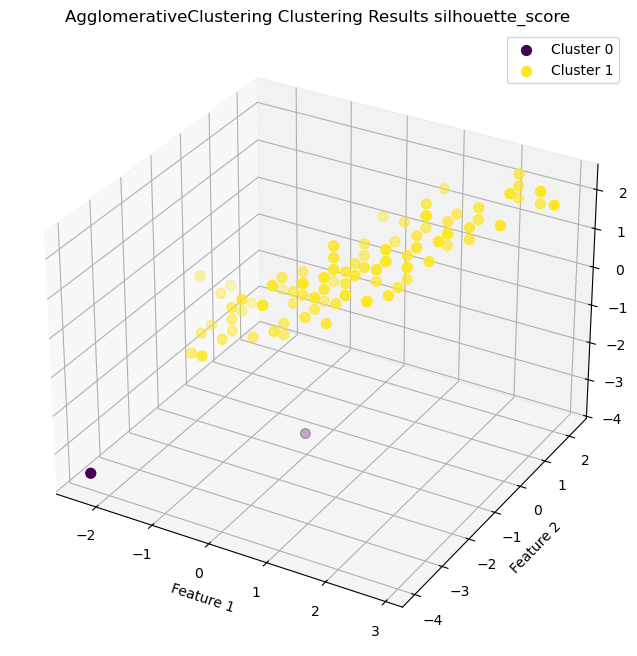

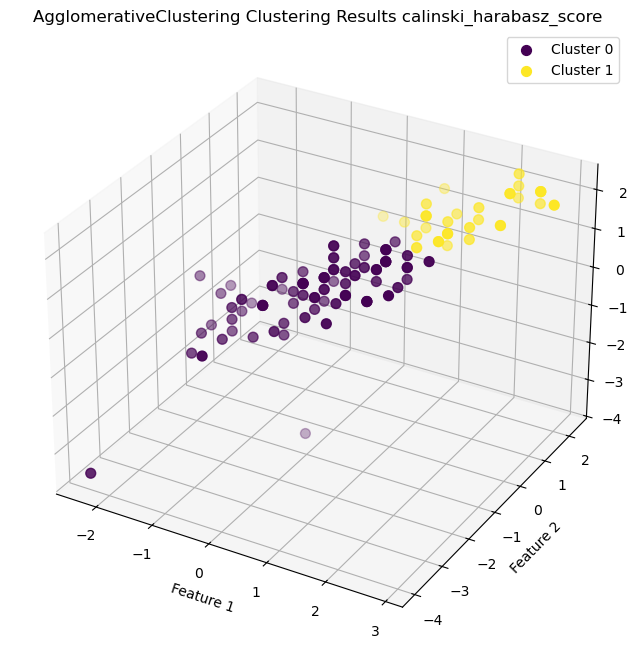

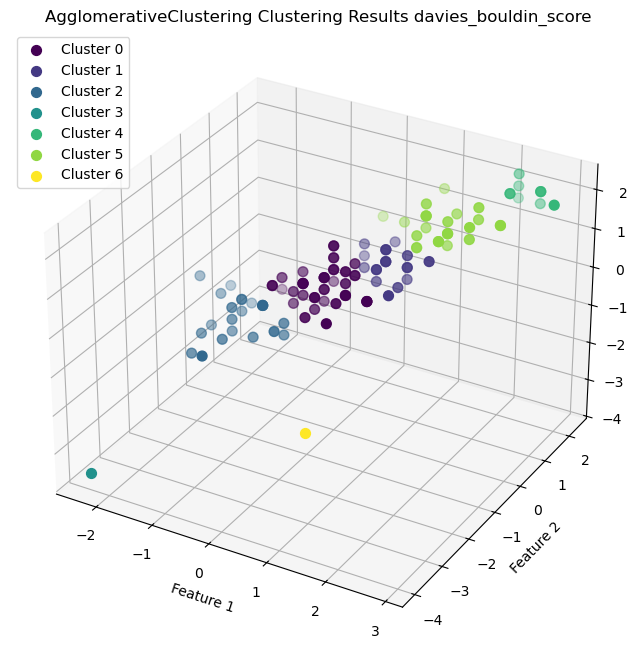

In [202]:


Agglo_params = {'n_clusters': [x for x in range(2,10)], 'linkage': ['ward', 'complete', 'average', 'single']}
Agglo = AgglomerativeClustering()
model = AgglomerativeClustering()


#print("AgglomerativeClustering: ", cluster_table.model('AgglomerativeClustering'))

if TO_RUN[2]:
    best_params, best_scores, best_model = manual_hyperparam_tuning(X_train_clustering_transformed, y_train_clustering, Agglo_params, metrics_mapping, AgglomerativeClustering)

    # Print the best parameters and scores for each metric

    for best_param, best_score in zip(best_params.items(), best_scores.items()):
        #print(best_param, best_score)
        #print(f'Achieved {best_score[0]} of {best_score[1]} with parameters {best_param[1]}')
        cluster_table.add_result('AgglomerativeClustering', best_score[0], best_score[1], best_param[1])

    print("AgglomerativeClustering: ", cluster_table.model('AgglomerativeClustering'))
    for metric , best_model in best_model.items():
        model = best_model
        plot_clustering_3d(X_test_clustering_transformed, model.fit_predict(X_test_clustering_transformed), title='AgglomerativeClustering Clustering Results ' + metric)


c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\mataz\anaconda3\envs\

OPTICS:  [adjusted_rand_score: 0.28106578298582874 with params: {'min_samples': 20, 'max_eps': 0.5, 'cluster_method': 'xi', 'xi': 0.2}]
[adjusted_mutual_info_score: 0.14941752630351793 with params: {'min_samples': 10, 'max_eps': 1.0, 'cluster_method': 'dbscan', 'xi': 0.05}]
[homogeneity_score: 0.6242799289364075 with params: {'min_samples': 5, 'max_eps': 2.0, 'cluster_method': 'xi', 'xi': 0.05}]
[completeness_score: 0.33616589221996634 with params: {'min_samples': 10, 'max_eps': 1.0, 'cluster_method': 'dbscan', 'xi': 0.05}]
[v_measure_score: 0.1562071911389179 with params: {'min_samples': 5, 'max_eps': 1.0, 'cluster_method': 'dbscan', 'xi': 0.05}]
[silhouette_score: 0.634599941172841 with params: {'min_samples': 20, 'max_eps': 2.0, 'cluster_method': 'xi', 'xi': 0.2}]
[calinski_harabasz_score: 128.76472589085114 with params: {'min_samples': 10, 'max_eps': 1.0, 'cluster_method': 'dbscan', 'xi': 0.05}]
[davies_bouldin_score: 5.6078517052128545 with params: {'min_samples': 10, 'max_eps': 0

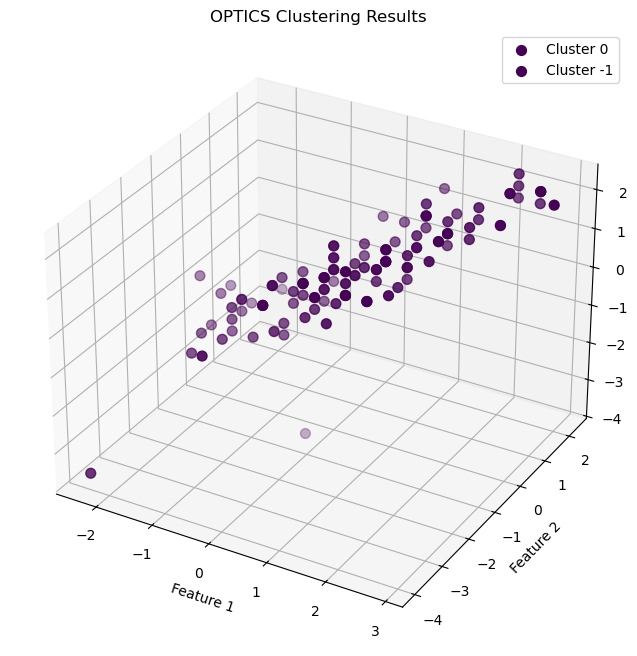

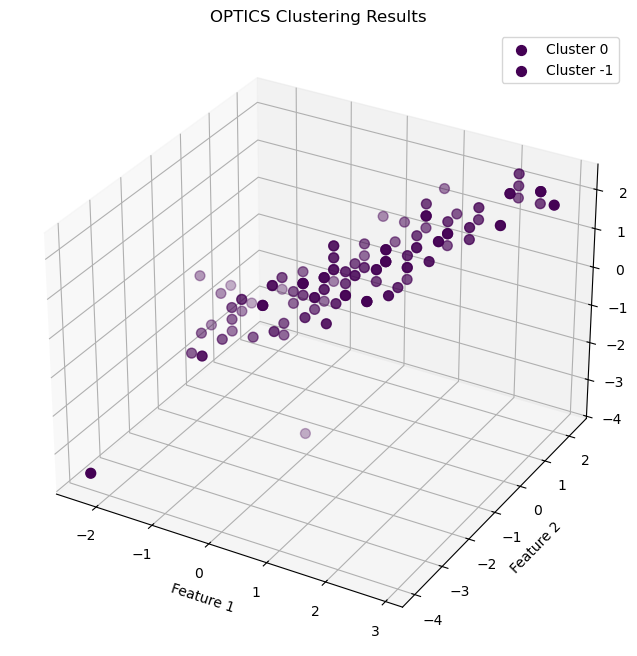

c:\Users\mataz\anaconda3\envs\ML\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


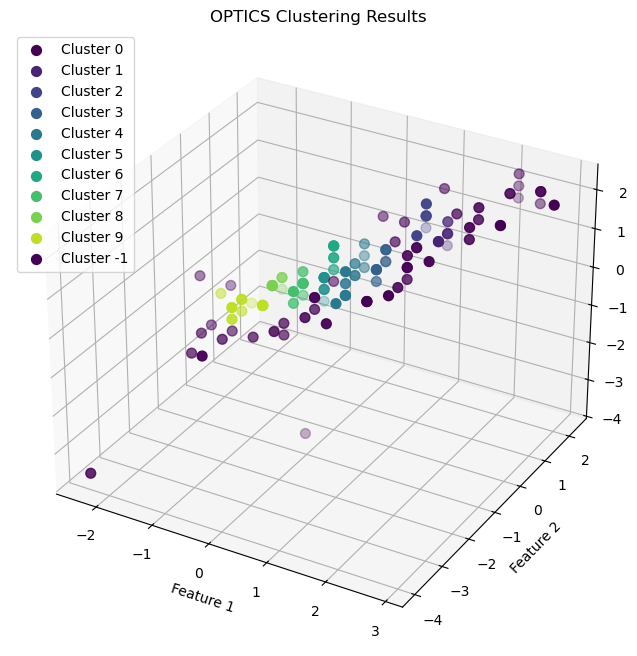

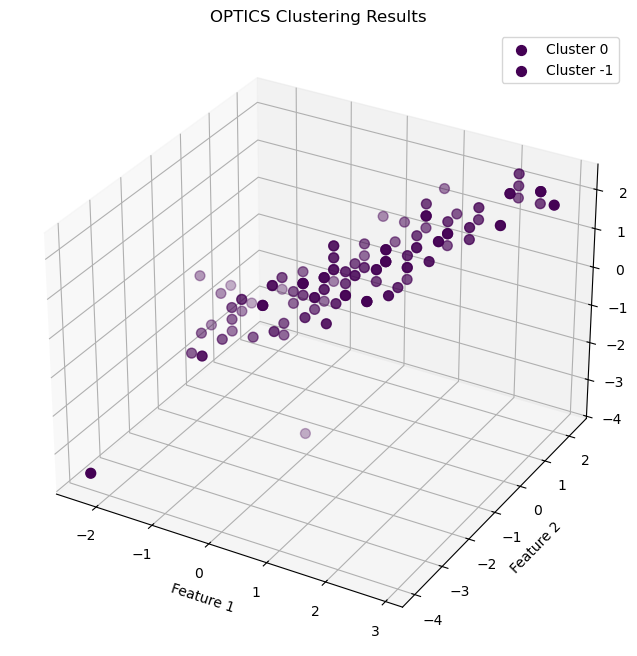

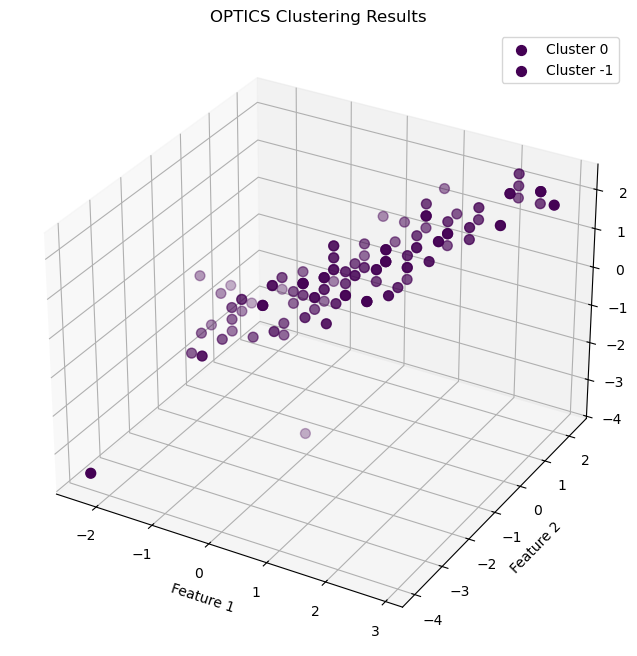

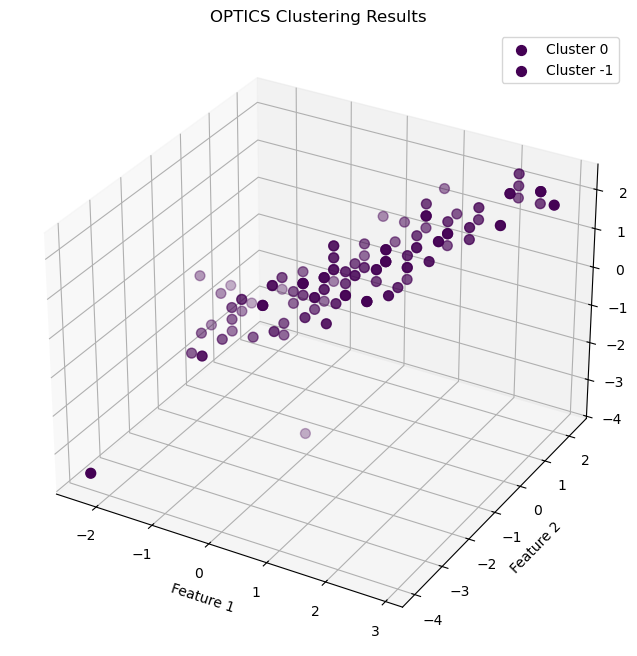

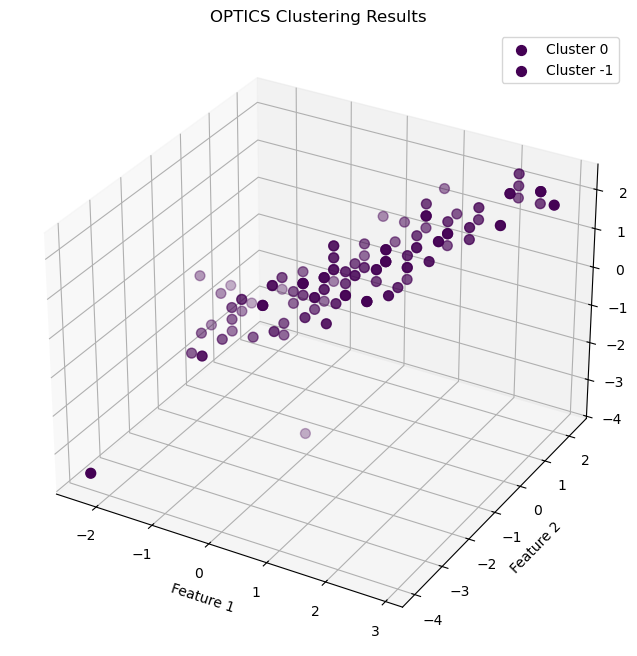

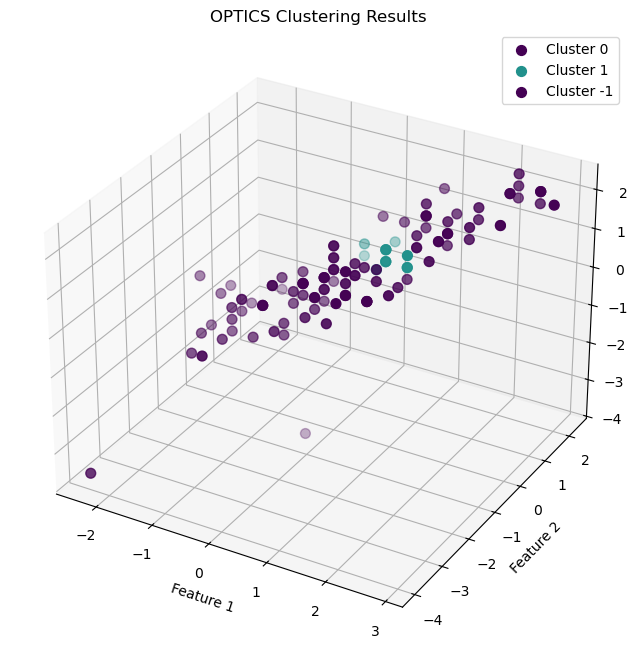

In [203]:
OPTICS_params = {
    'min_samples': [5, 10, 20],
    'max_eps': [0.5, 1.0, 2.0],
    'cluster_method': ['xi', 'dbscan'],
    'xi': [0.05, 0.1, 0.2]
}
optics = OPTICS()


if TO_RUN[2]:
    best_params, best_scores, best_model = manual_hyperparam_tuning(X_train_clustering_transformed, y_train_clustering, OPTICS_params, metrics_mapping, OPTICS)

    # Print the best parameters and scores for each metric

    for best_param, best_score in zip(best_params.items(), best_scores.items()):
        #print(best_param, best_score)
        #print(f'Achieved {best_score[0]} of {best_score[1]} with parameters {best_param[1]}')
        cluster_table.add_result('OPTICS', best_score[0], best_score[1], best_param[1])

    print("OPTICS: ", cluster_table.model('OPTICS'))
    for metric, best_model in best_model.items():
        model = best_model
        plot_clustering_3d(X_test_clustering_transformed, model.fit_predict(X_test_clustering_transformed), title='OPTICS Clustering Results')





    '''for metric in metrics:
        optimizer = GridSearchCV(optics, OPTICS_params, cv=5, scoring=metric)
        optimizer.fit(X_train_clustering_transformed, y_train_clustering)
        best_params = optimizer.best_params_
        best_score = optimizer.best_score_
        best_model = optimizer.best_estimator_
        cluster_table.add_result('OPTICS', metric, metrics_mapping[metric](y_test_clustering, best_model.fit_predict(X_test_clustering_transformed)), best_params)
        '''

    #print("OPTICS: ", cluster_table.model('OPTICS'))





Birch:  [adjusted_rand_score: 0.7439760290344253 with params: {'threshold': 0.1, 'branching_factor': 50, 'n_clusters': 2}]
[adjusted_mutual_info_score: 0.5825632535884779 with params: {'threshold': 0.1, 'branching_factor': 50, 'n_clusters': 2}]
[homogeneity_score: 1.0000000000000009 with params: {'threshold': 0.1, 'branching_factor': 20, 'n_clusters': None}]
[completeness_score: 0.5601764048366651 with params: {'threshold': 0.1, 'branching_factor': 50, 'n_clusters': 2}]
[v_measure_score: 0.5834378379109822 with params: {'threshold': 0.1, 'branching_factor': 50, 'n_clusters': 2}]
[silhouette_score: 0.8516377550009497 with params: {'threshold': 0.1, 'branching_factor': 20, 'n_clusters': None}]
[calinski_harabasz_score: 5.703850007307406e+32 with params: {'threshold': 0.1, 'branching_factor': 50, 'n_clusters': None}]
[davies_bouldin_score: 0.8386930669805951 with params: {'threshold': 0.5, 'branching_factor': 20, 'n_clusters': None}]



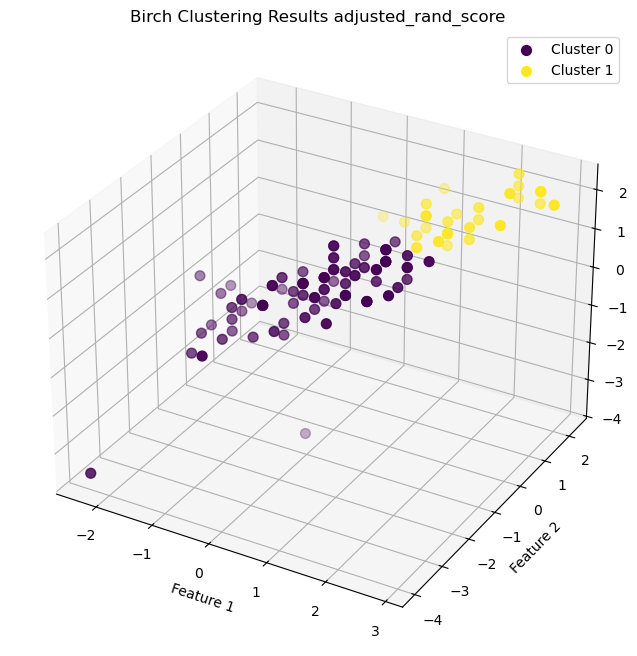

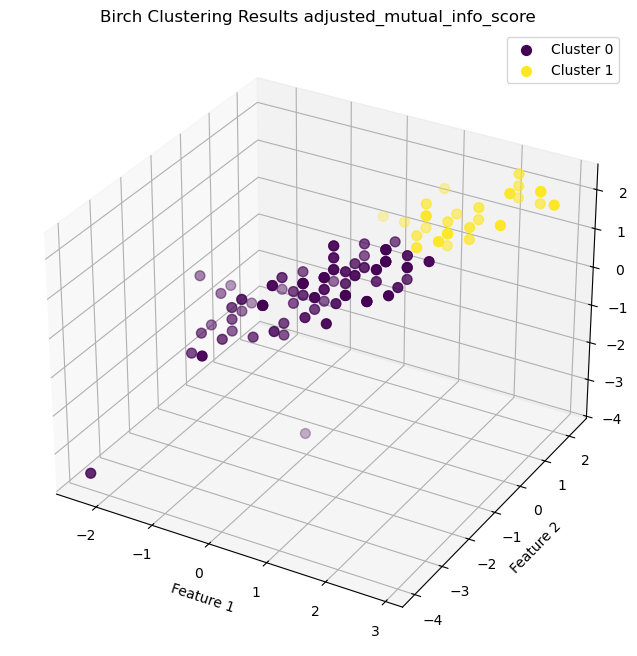

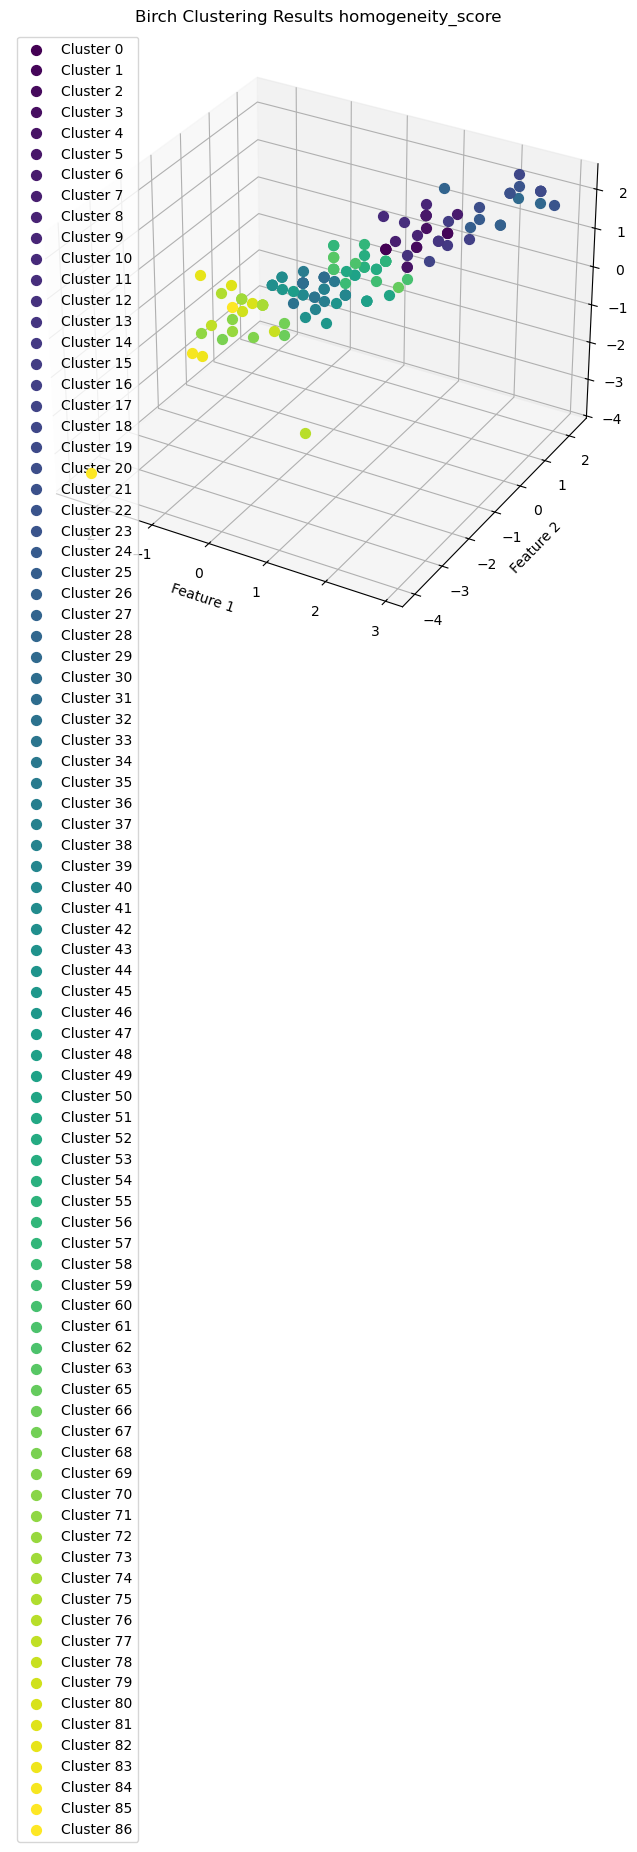

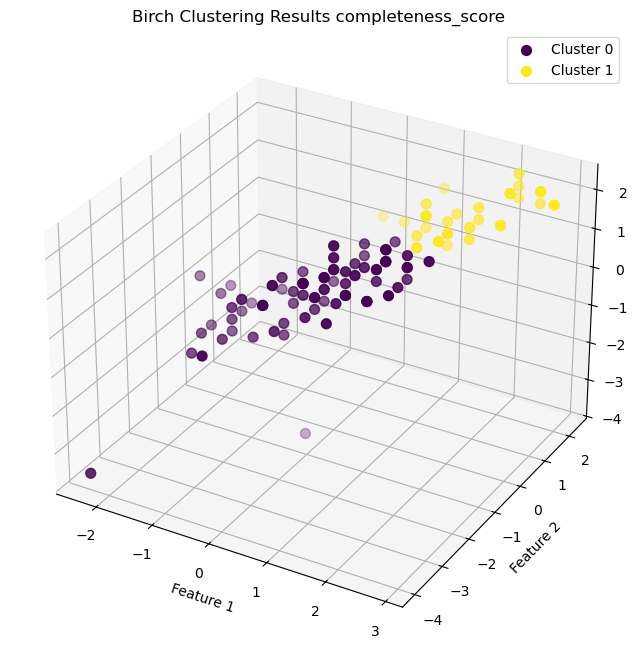

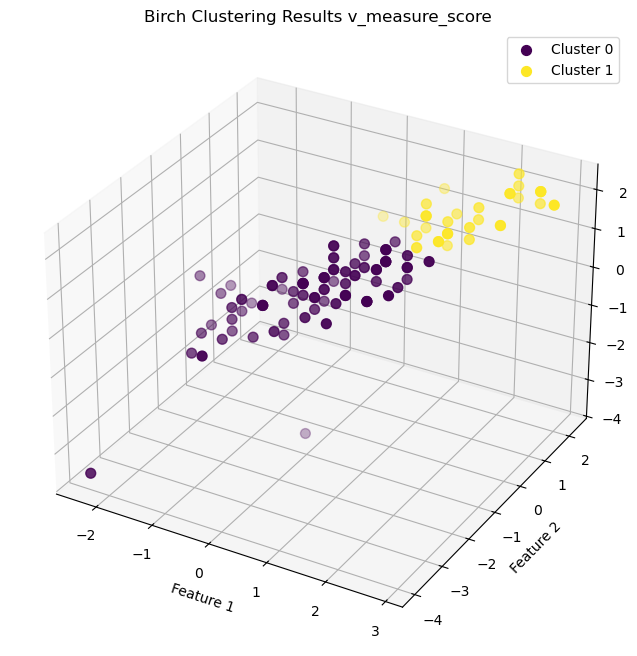

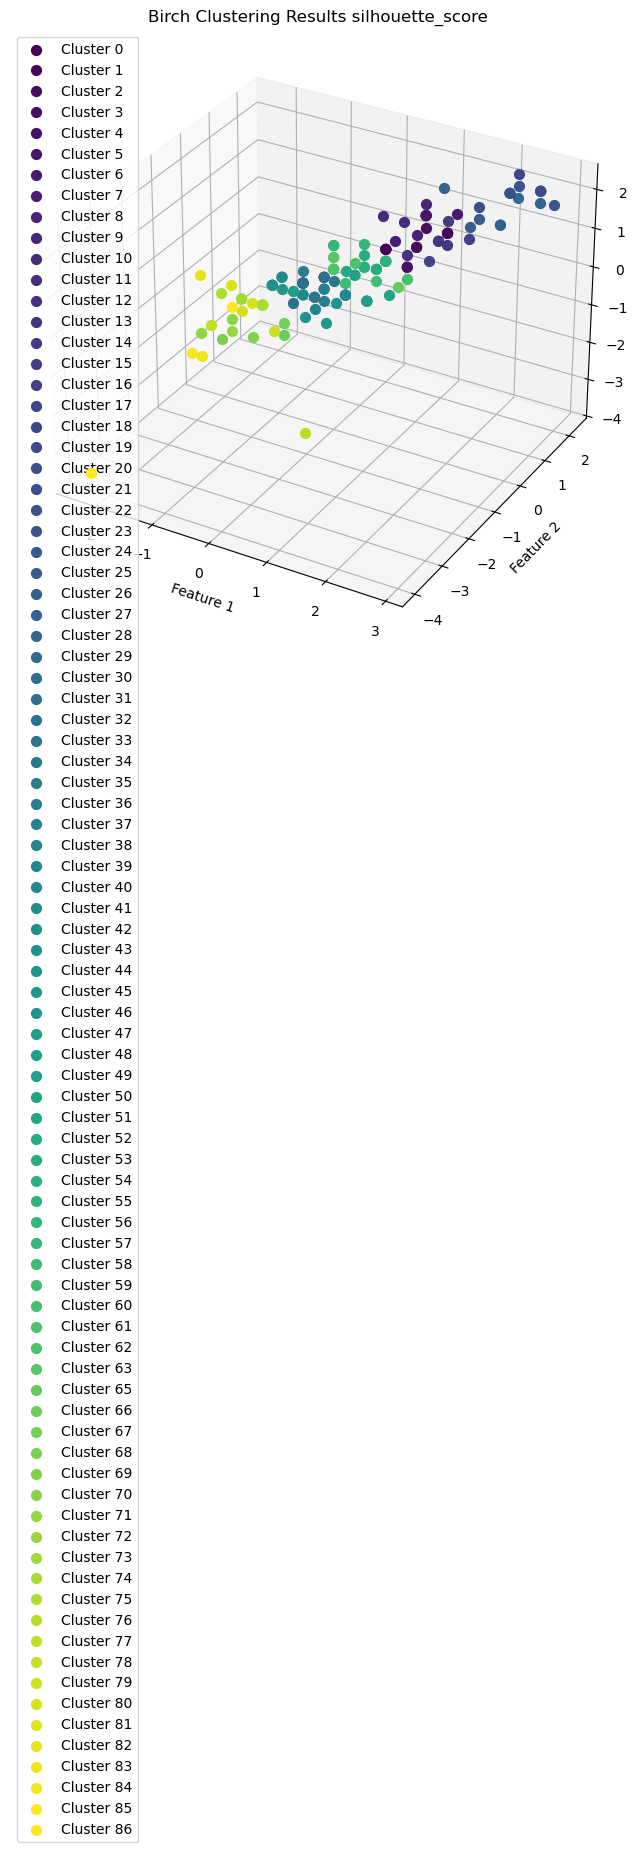

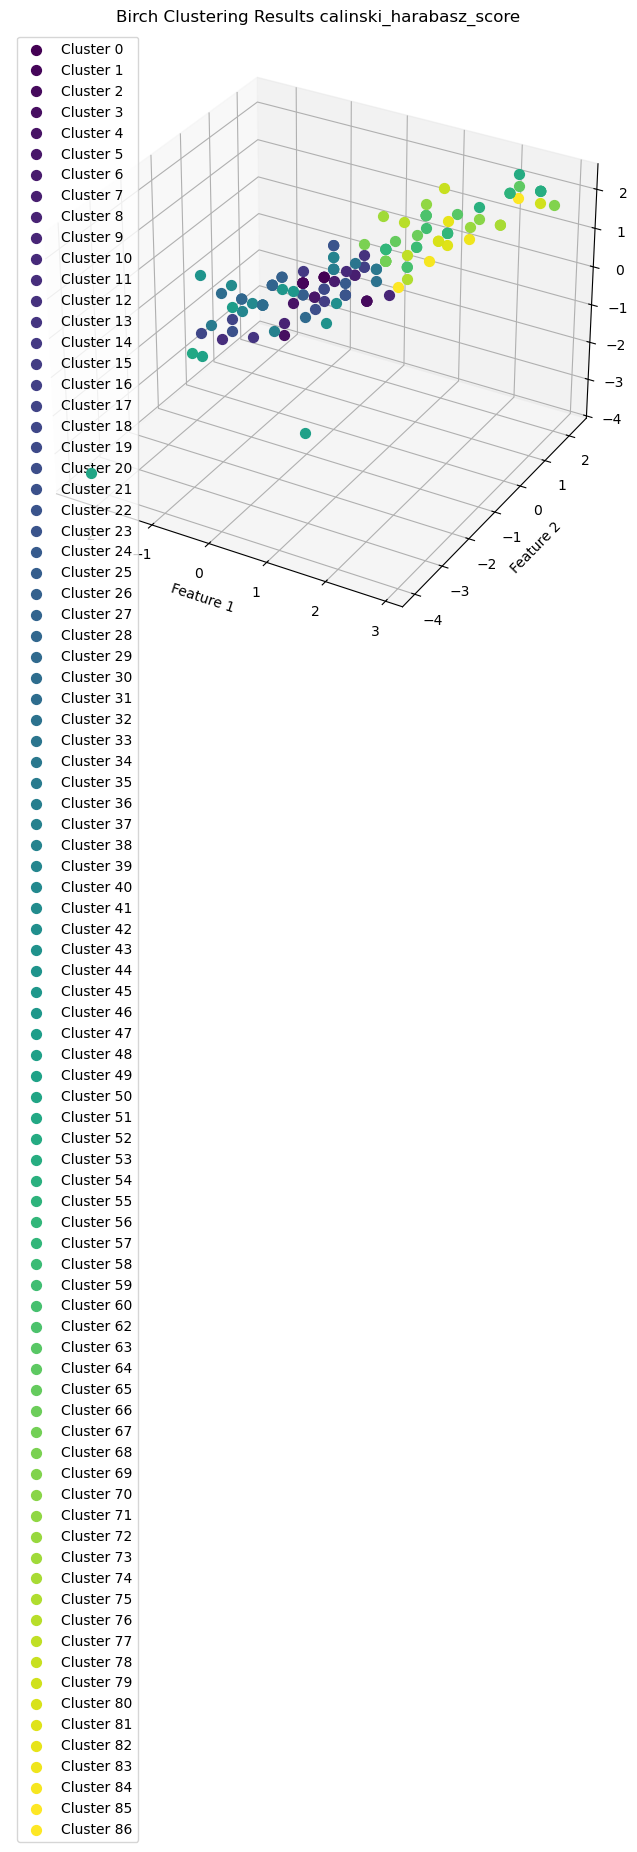

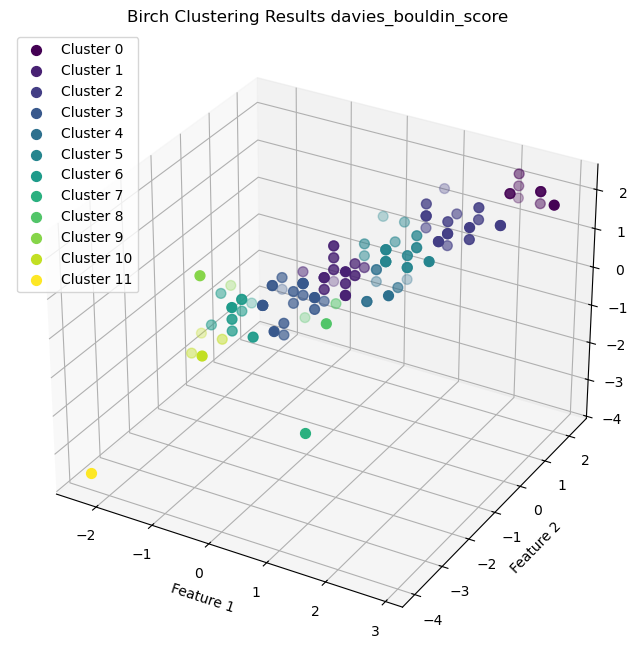

In [204]:
birch_params = {
    'threshold': [0.1, 0.5, 1.0],
    'branching_factor': [20, 50, 100],
    'n_clusters': [None, 2, 3, 4, 5]
}
birch = Birch()
model = Birch()

if TO_RUN[2]:
    best_params, best_scores, best_model = manual_hyperparam_tuning(X_train_clustering_transformed, y_train_clustering, birch_params, metrics_mapping, Birch)

    # Print the best parameters and scores for each metric

    for best_param, best_score in zip(best_params.items(), best_scores.items()):
        #print(best_param, best_score)
        #print(f'Achieved {best_score[0]} of {best_score[1]} with parameters {best_param[1]}')
        cluster_table.add_result('Birch', best_score[0], best_score[1], best_param[1])

    print("Birch: ", cluster_table.model('Birch'))
    for metric, best_model in best_model.items():
        model = best_model
        plot_clustering_3d(X_test_clustering_transformed, model.fit_predict(X_test_clustering_transformed), title='Birch Clustering Results ' + metric)





    '''for metric in metrics:
        optimizer = GridSearchCV(birch, birch_params, cv=5, scoring=metric)
        optimizer.fit(X_train_clustering_transformed, y_train_clustering)
        best_params = optimizer.best_params_
        best_score = optimizer.best_score_
        best_model = optimizer.best_estimator_
        cluster_table.add_result('Birch', metric, metrics_mapping[metric](y_test_clustering, best_model.fit_predict(X_test_clustering_transformed)), best_params)
        model = best_model
        plot_clustering_3d(X_test_clustering_transformed, model.fit_predict(X_test_clustering_transformed), title='Birch Clustering Results' + metric)
    print("Birch: ", cluster_table.model('Birch'))'''
    




In [ ]:
if TO_RUN[2]:
    save_table(cluster_table, 'results_clustering.txt')
